# Execução de algoritmos em hardware quântico

### André Juan Ferreira Martins

30/11/2023
_______________________

## Conteúdo apresentado no  [Itaú Data Meetup #28 Hardwares Quânticos](https://www.meetup.com/itau-data/events/297418712/)

___________________

Neste workshop, abordaremos os seguintes tópicos:

- O hardware quântico da IBM
- IBM Quantum Platform
- Execução de job simples
- Qiskit Runtime

Primeiramente, não deixe de instalar as seguintes bibliotecas:

`!pip install --upgrade qiskit[visualization]`

`!pip install pip install graphviz`

`!pip install qiskit_ibm_provider`

`!pip install qiskit-aer`

`!pip install qiskit_ibm_runtime`

Cheque as versões das bibliotecas em seu ambiente:

In [ ]:
import qiskit

qiskit.__qiskit_version__

{'qiskit': '0.45.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': '0.6.0', 'qiskit-machine-learning': None}

________

## Qubits supercondutores

<img src="https://www.cmc.ca/wp-content/uploads/2020/06/IBM_Q_Hub_2.jpg" width=400>

Fonte: [CMC](https://www.cmc.ca/wp-content/uploads/2020/06/IBM_Q_Hub_2.jpg)

![image.png](attachment:image.png)

<img src="https://resources.news.e.abb.com/images/2021/2/23/0/Quantum_computing_the_hype_and_hopes_m0083-02-EN.jpg" width=600>

Fonte: [ABB](https://new.abb.com/news/detail/74736/quantum-computing-the-hype-and-hopes)

## Qubits supercondutores são como "átomos artificiais"

![image.png](attachment:image.png)

Fonte: [Pennylane](https://pennylane.ai/qml/demos/tutorial_sc_qubits/)

![image.png](attachment:image.png)

Fonte: [Pennylane](https://pennylane.ai/qml/demos/tutorial_sc_qubits/)

## Oscilador harmônico ataca novamente

<img src="https://www.animations.physics.unsw.edu.au/jw/images/resonance3.gif" width=500>

Fonte: [UNSW](https://www.animations.physics.unsw.edu.au/)

<img src=https://www.researchgate.net/publication/349728033/figure/fig3/AS:997112435208193@1614741538747/a-Circuit-of-an-LC-oscillator-with-inductance-L-and-capacitance-C-We-denote-the-phase.png width=500>

Fonte: [The superconducting circuit companion -- an introduction with worked examples](https://www.researchgate.net/publication/349728033_The_superconducting_circuit_companion_--_an_introduction_with_worked_examples)

## O Transmon

Qubit supercondutor de carga:

![image.png](attachment:image.png)

Fonte: [Pennylane](https://pennylane.ai/qml/demos/tutorial_sc_qubits/)

_________

Para saber mais sobre hardwares quânticos, recomendo começar [por esta página](https://en.wikipedia.org/wiki/Qubit#Physical_implementations).

__________

### Gates: pulsos eletromagnéticos (microondas) ressonantes (*resonant microwave pulses*)

<img src="https://www.researchgate.net/publication/5500588/figure/fig3/AS:601793524400138@1520490165744/Color-online-Quantum-circuit-a-and-pulse-sequence-b-for-measuring-the-overlap-L-for.png" width=600>

Fonte: [Detection of Quantum Critical Points by a Probe Qubit](https://www.researchgate.net/publication/5500588)

Aos interessados, recomendo o [qiskit pulse](https://docs.quantum.ibm.com/api/qiskit/pulse):

<img src="https://qiskit.org/documentation/stable/0.25/_images/tutorials_circuits_advanced_07_pulse_scheduler_7_1.png" width=600>

Fonte: [Qiskit Pulse](https://docs.quantum.ibm.com/build/pulse)

___________
___________
___________

# Execução de um job - fluxo de informação

<img src="https://electronics360.globalspec.com/images/assets/553/13553/IBM_quantum_computing_flowchart.jpg" width=1000>

Fonte: [Electronics 360](https://electronics360.globalspec.com/article/13553/how-quantum-computers-work)

___________
___________
___________

# IBM Quantum Plataform

<img src="https://quantum-computing.ibm.com/_nuxt/img/platformLightScreenshot.3037ae2.png">

Fonte: [IBM Quantum](https://quantum-computing.ibm.com)

___________
___________
___________

# Execução de job simples

Vamos começar preparando um estado de Bell

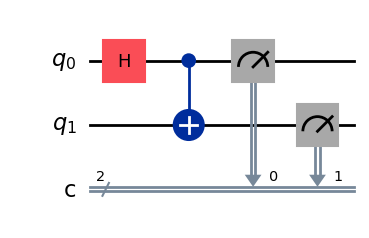

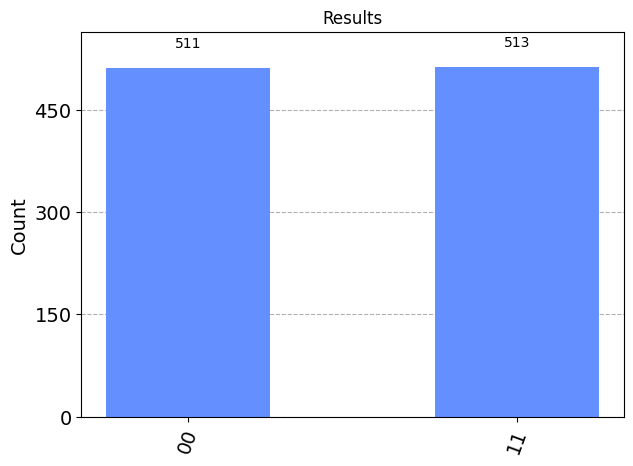

In [ ]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================

simulator = BasicAer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1024, seed_simulator=42)
result = job.result()

counts = result.get_counts()

display(plot_histogram(counts, title="Results"))

## IBMProvider - comunicação com o ambiente IBM Quantum

In [ ]:
from qiskit_ibm_provider import IBMProvider

# IBMProvider.save_account("seu_token")
# IBMProvider.saved_accounts()

# pode ser necessário definir o argumento "instance"
# ver na IBM quantum platform >> account >> manage account >> profile overvies
provider = IBMProvider()

Vamos explorar os backends (hardwares quânticos + simuladores) disponíveis

In [ ]:
provider.backends()

[<IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_kyoto')>]

Apenas os hardwares quânticos disponíveis para uso

In [ ]:
quantum_devices_available = provider.backends(simulator=False, operational=True)

quantum_devices_available

[<IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_kyoto')>]

Ao selecionar um backend (objeto `IBMBackend`), podemos acessar diversos atributos e métodos bem úteis

In [ ]:
backend = quantum_devices_available[0]

backend

<IBMBackend('ibm_hanoi')>

In [ ]:
backend.name

'ibm_hanoi'

In [ ]:
backend.status()

In [ ]:
backend.num_qubits

27

Vamos selecionar backends relativamente pequenos, para visualizar mais detalhes sobre eles:

In [ ]:
small_devices = provider.backends(simulator=False, operational=True, filters=lambda b: b.num_qubits < 30)

small_devices

[<IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>]


Backend: ibm_hanoi

Coupling map:

[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]



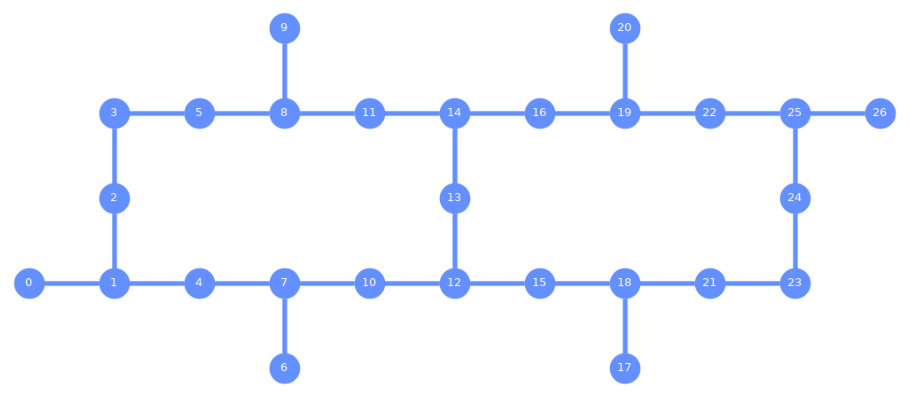


Backend: ibm_cairo

Coupling map:

[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]



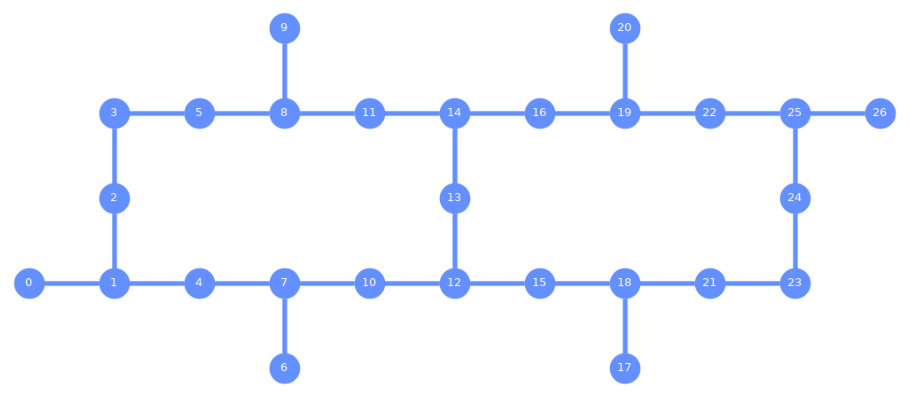


Backend: ibmq_kolkata

Coupling map:

[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]



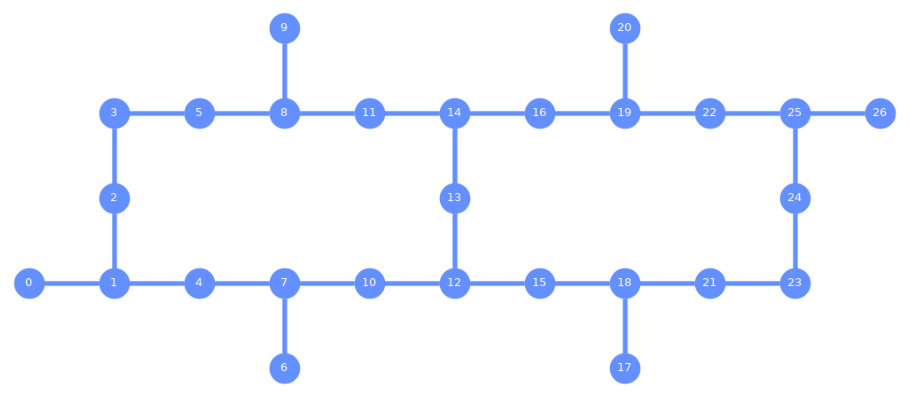


Backend: ibmq_mumbai

Coupling map:

[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]



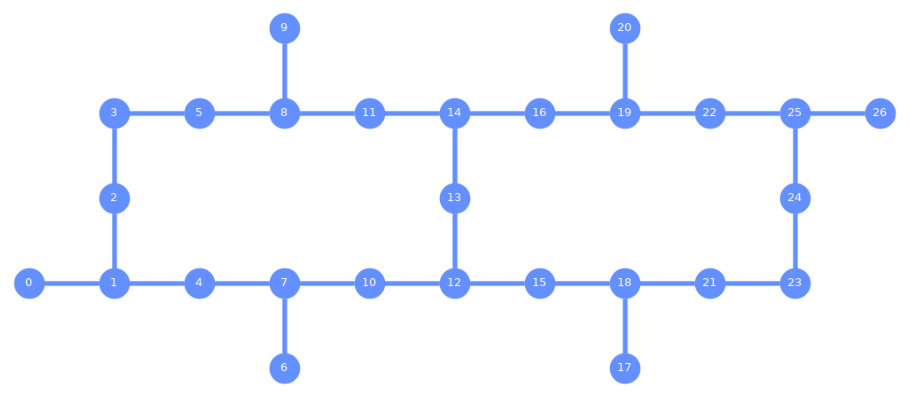

In [ ]:
from qiskit.visualization import plot_gate_map

for backend in small_devices:

    print(f"\nBackend: {backend.name}")

    print(f"\nCoupling map:\n\n{backend.configuration().coupling_map}\n")

    display(plot_gate_map(backend))

    display(backend.status())

    print("="*50)

> *If the returned BackendStatus instance has `operational=True` but `status_msg="internal"`, then the backend is accepting jobs but not processing them.*

É possível escolhermos o backend menos ocupado (com menos jobs na lista de execução).

Isso pode ser muito útil para testes rápidos!

In [ ]:
from qiskit_ibm_provider import least_busy

devices = provider.backends(simulator=False, operational=True)
backend_least_busy = least_busy(devices)

backend_least_busy.status()

## Transpilação: importante passo para execução

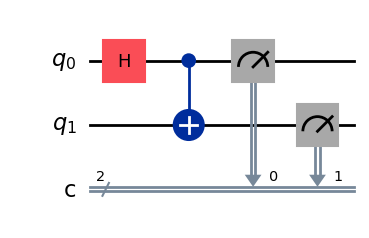

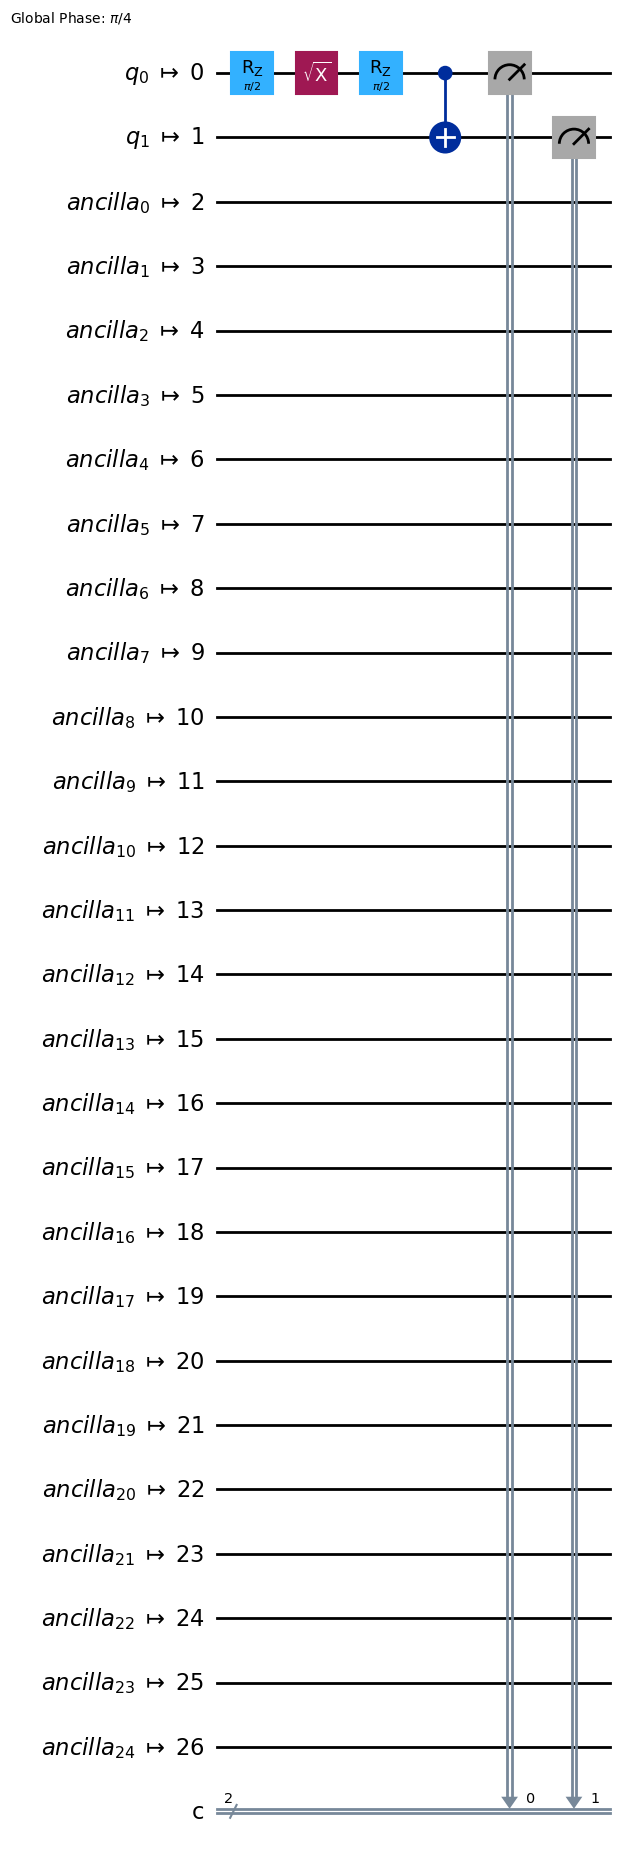

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================

from qiskit.compiler import transpile

mapped_circuit = transpile(qc, backend=backend)

display(mapped_circuit.draw("mpl", style="iqp"))

A transpilação depende do conjunto de gates disponíveis no backend selecionado ("basis gates"):

In [ ]:
backend.configuration().basis_gates

['cx', 'id', 'rz', 'sx', 'x']

In [ ]:
print(mapped_circuit.depth())
print(mapped_circuit.count_ops())

5
OrderedDict([('rz', 2), ('measure', 2), ('sx', 1), ('cx', 1)])


In [ ]:
print(qc.depth())
print(qc.count_ops())

3
OrderedDict([('measure', 2), ('h', 1), ('cx', 1)])


## Executando o job

In [ ]:
job = backend_least_busy.run(mapped_circuit, shots=1024, job_tags=["bell"])

In [ ]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
job.job_id()

'cnmh1py24wx0008f8qm0'

__________

Enquanto esperamos, vamos ver alguns jobs já finalizados...

In [ ]:
for ran_job in provider.backend.jobs(limit=5):

    print(f'{ran_job.job_id()} - date: {ran_job.creation_date().date()} - tags: {ran_job.tags()} - status: {ran_job.status()} ')

cnmh1py24wx0008f8qm0 - date: 2023-11-30 - tags: ['bell'] - status: JobStatus.QUEUED 
cnmgp200k0p00088sce0 - date: 2023-11-30 - tags: ['bell'] - status: JobStatus.DONE 
cnmftnjqz850008g1s2g - date: 2023-11-30 - tags: ['bell'] - status: JobStatus.DONE 
cnmfmfhb4zk00082a8xg - date: 2023-11-30 - tags: ['bell'] - status: JobStatus.DONE 
cnmaqe5tpj70008436z0 - date: 2023-11-30 - tags: ['bell'] - status: JobStatus.DONE 


In [ ]:
retrieved_job = provider.backend.retrieve_job("cnmftnjqz850008g1s2g")

retrieved_job

<IBMCircuitJob('cnmftnjqz850008g1s2g')>

> ### IMPORTANTE: você só pode recuperar os jobs que foram dorados na sua conta. Se você tentar recuperar o job com o ID acima, não vai dar certo (porque tá na minha conta...), então, não deixe de trocar o ID em todas as chamadas da função `.retrieve_job()` pros jobs de vocês!

In [ ]:
retrieved_job.backend()

<IBMBackend('ibm_cairo')>

In [ ]:
retrieved_job.creation_date()

datetime.datetime(2023, 11, 30, 18, 23, 34, 510000, tzinfo=tzlocal())

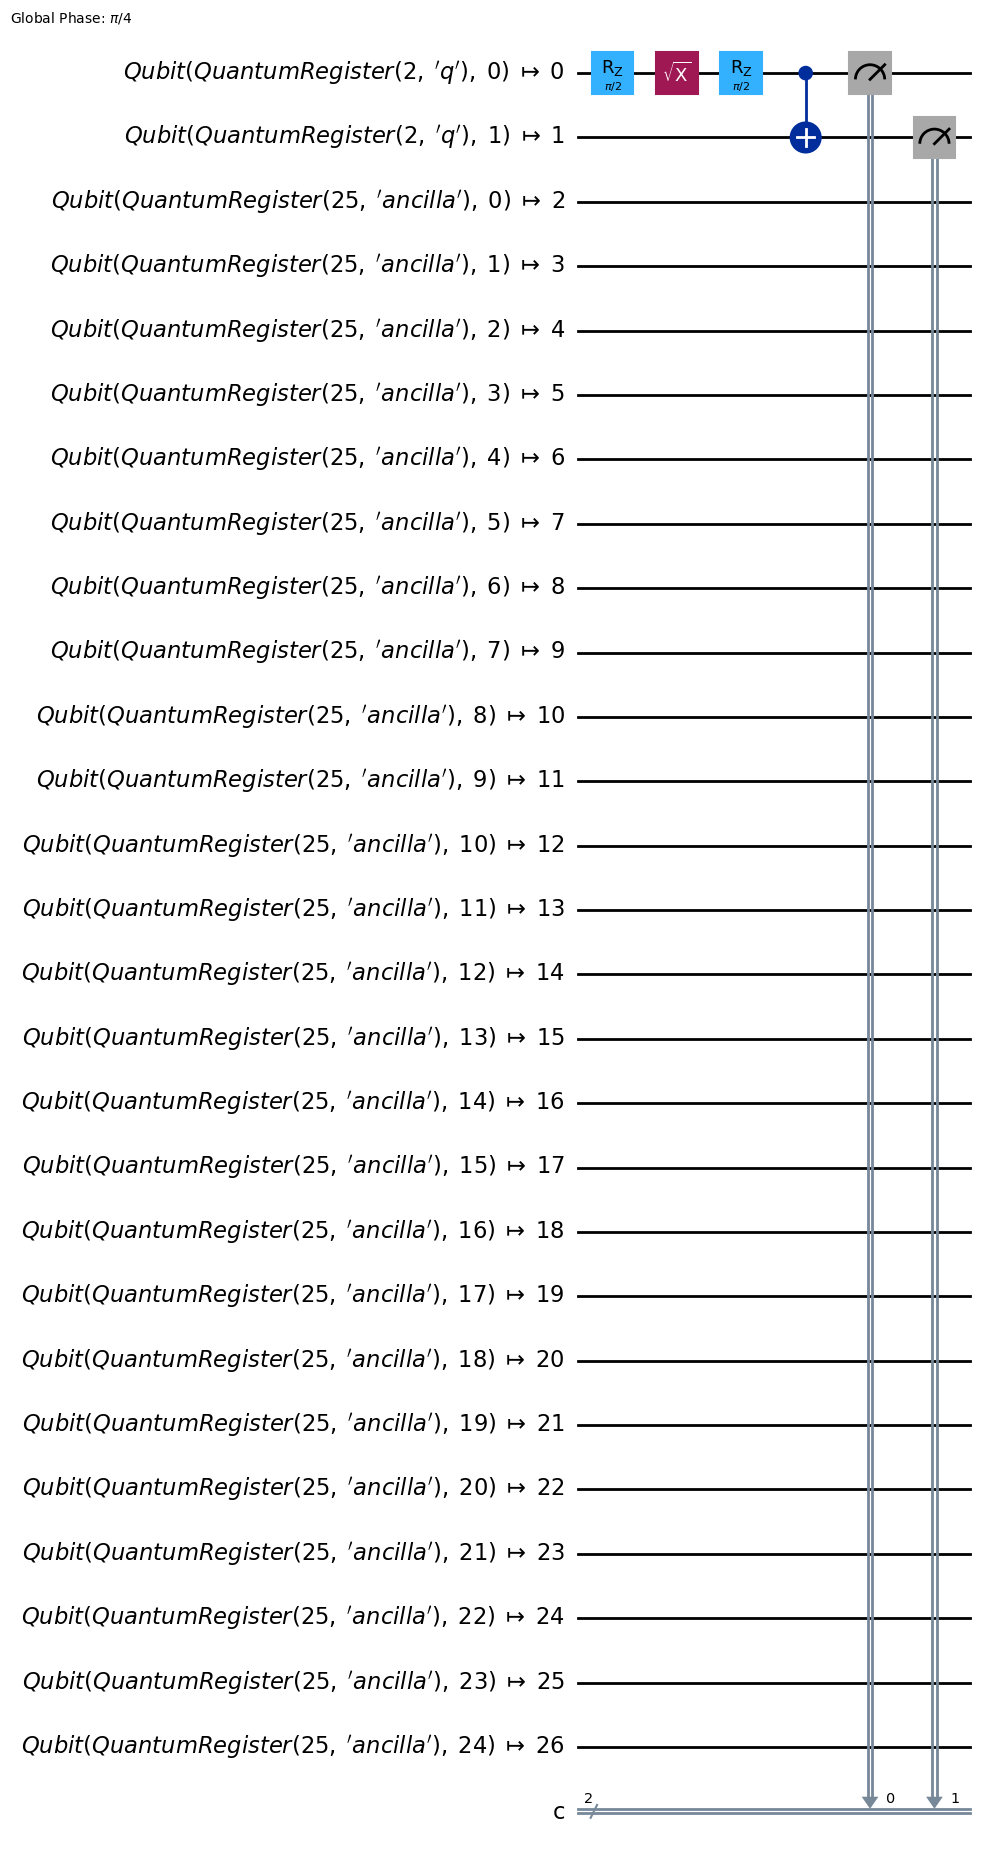

In [ ]:
retrieved_job.circuits()[0].draw("mpl", style="iqp")

In [ ]:
retrieved_job.result()

Result(backend_name='ibm_cairo', backend_version='0.0.0', qobj_id='Unknown', job_id='circuit-runner_clkfqlqqv1fubv1t2g20_9a65_0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 8, '0x0': 494, '0x2': 23, '0x3': 499}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26]], n_qubits=27, qreg_sizes=[['q', 27]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-154', global_phase=0.7853981633974483, metadata={}), status=done, meas_return=avg)], date=2023-11-30 18:23:38.332442-03:00, status=done, header=QobjHeader(backend_name='ibm_cairo', backend_version='1.3.5'), execution_id='', time_taken=0.6874783409999998,

In [ ]:
retrieved_job.result().get_counts()

{'01': 8, '00': 494, '10': 23, '11': 499}

__________

Vamos comparar os resultados da execução simulada do circuito com a execução em hardware:

In [ ]:
job = provider.backend.retrieve_job("cnmftnjqz850008g1s2g")

job.status()

<JobStatus.DONE: 'job has successfully run'>

In [ ]:
counts_hardware = job.result().get_counts()

counts_hardware

{'01': 8, '00': 494, '10': 23, '11': 499}

In [ ]:
job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

counts_simulator

{'00': 511, '11': 513}

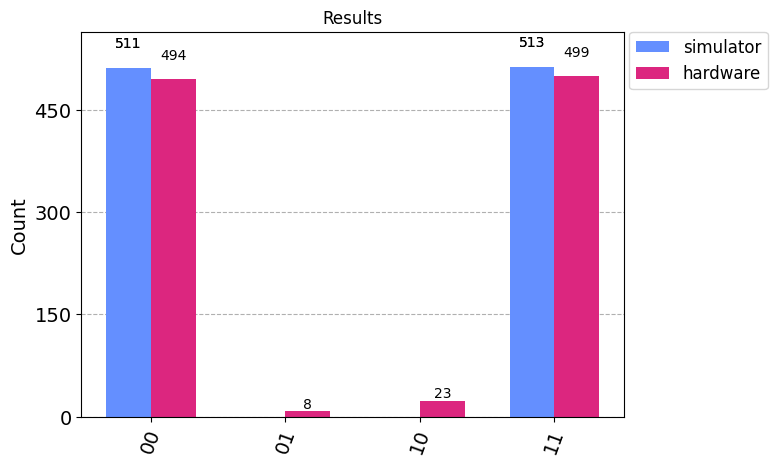

In [ ]:
legend=["simulator", "hardware"]

plot_histogram([counts_simulator, counts_hardware], title="Results", legend=legend)

O estado de Bell que preparamos com o circuito foi:

$$ | \psi_{\text{Bell}} \rangle = | \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left ( | 00 \rangle + | 11 \rangle \right ) $$

Devido ao ruído, foram medidos os estados $| 01 \rangle $ e $ | 10 \rangle$, que sabemos ser impossíveis dada a preparação de estado que fizemos!

### Simulador com ruído

Podemos também utilizar um simulador construído com base em medidas empíricas de ruídos de um determinado backend real. Isso é muito útil para termos expectativas mais realistas com relação aos erros, o que nos ajuda também a testar ferramentas de mitigação de ruídos, como veremos mais tarde.

In [ ]:
from qiskit.providers.fake_provider import FakeCairoV2

fake_backend = FakeCairoV2()

fake_backend

In [ ]:
from qiskit_aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(fake_backend)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'cx', 'measure', 'reset', 'id', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)

In [ ]:
job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

counts_simulator_noisy

{'01': 20, '10': 14, '00': 511, '11': 479}

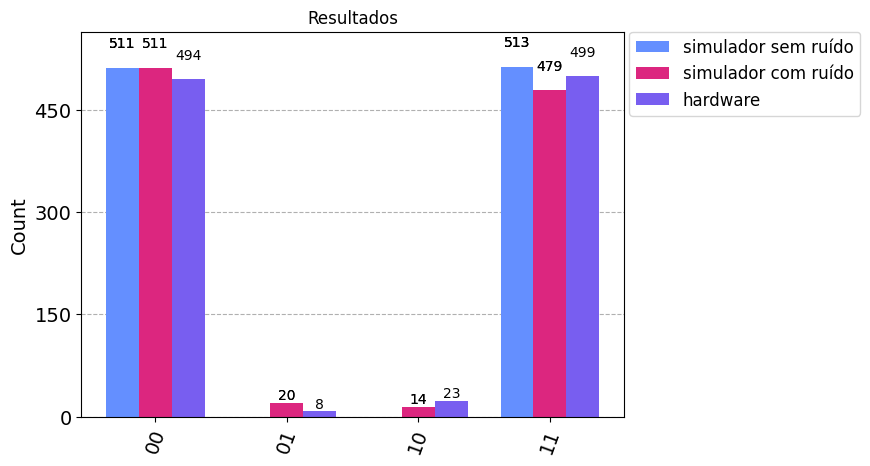

In [ ]:
legend=["simulador sem ruído", "simulador com ruído", "hardware"]

plot_histogram([counts_simulator, counts_simulator_noisy, counts_hardware], title="Resultados", legend=legend)

In [ ]:
fake_backend._props_dict["last_update_date"]

datetime.datetime(2021, 12, 9, 12, 24, 17, tzinfo=tzoffset(None, -18000))

__________

Note um importante detalhe da [documentação sobre fake backends](https://qiskit.org/documentation/apidoc/providers_fake_provider.html):

> Please note that the simulation is done using a noise model generated from system snapshots obtained in the past (sometimes a few years ago) and the results are not representative of the latest behaviours of the real quantum system which the fake backend is mimicking. If you want to run noisy simulations to compare with the real quantum system, please follow steps below to generate a simulator mimics a real quantum system with the latest calibration results.

Assim, devemos fazer o seguinte:

In [ ]:
backend_least_busy

<IBMBackend('ibm_cairo')>

In [ ]:
from qiskit.providers.aer import AerSimulator

fake_backend = AerSimulator.from_backend(backend_least_busy)

In [ ]:
fake_backend._properties.qubits

[[Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605677, tzinfo=datetime.timezone.utc), readout_error, , 0.011900000000000022),
  Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605679, tzinfo=datetime.timezone.utc), readout_length, s, 7.324444444444445e-07)],
 [Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605681, tzinfo=datetime.timezone.utc), readout_error, , 0.008299999999999974),
  Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605682, tzinfo=datetime.timezone.utc), readout_length, s, 7.324444444444445e-07)],
 [Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605684, tzinfo=datetime.timezone.utc), readout_error, , 0.015000000000000013),
  Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605685, tzinfo=datetime.timezone.utc), readout_length, s, 7.324444444444445e-07)],
 [Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605686, tzinfo=datetime.timezone.utc), readout_error, , 0.020000000000000018),
  Nduv(datetime.datetime(2023, 11, 30, 22, 47, 12, 605687, tzinfo=datetime.tim

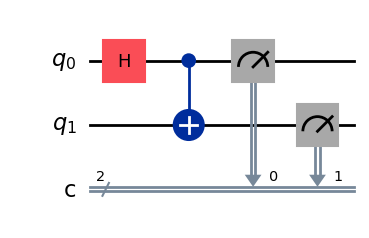

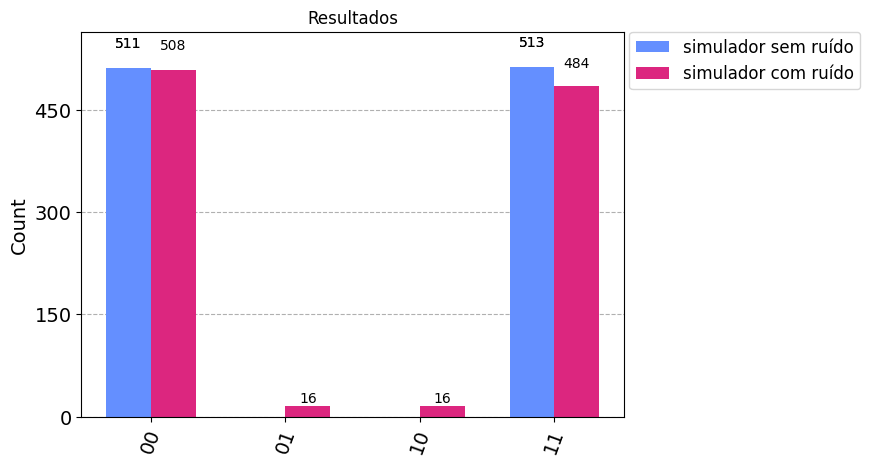

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_hanoi'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

# ==============================

legend=["simulador sem ruído", "simulador com ruído"]
display(plot_histogram([counts_simulator, counts_simulator_noisy], title="Resultados", legend=legend))

Vamos ver isso na prática com um outro exemplo: estado GHZ de 3 qubits

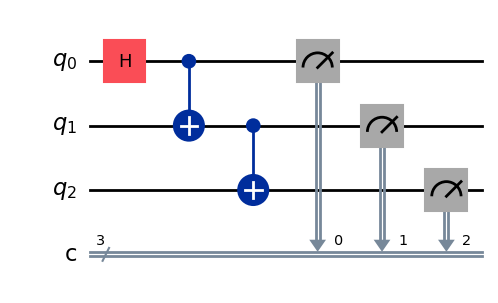

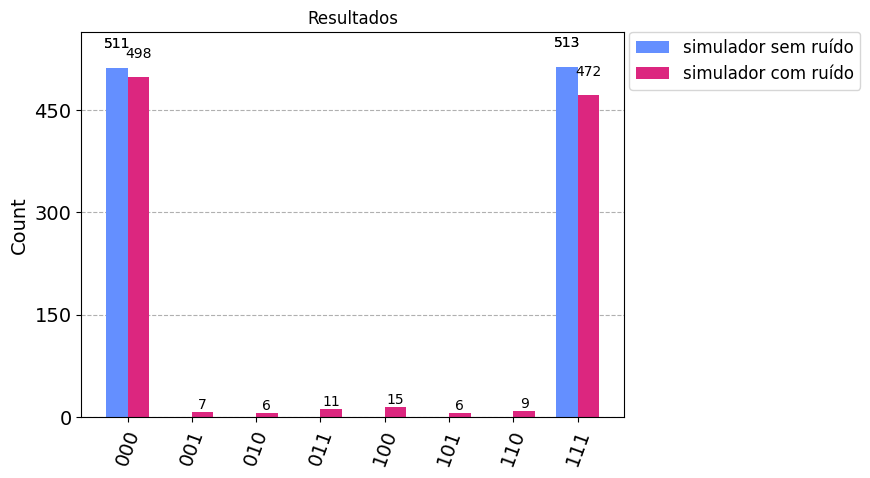

In [ ]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure(range(3), range(3))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_hanoi'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

# ==============================

legend=["simulador sem ruído", "simulador com ruído"]
display(plot_histogram([counts_simulator, counts_simulator_noisy], title="Resultados", legend=legend))

In [ ]:
# ==============================
# hardware

devices = provider.backends(simulator=False, operational=True)
backend_least_busy = least_busy(devices)
print(backend_least_busy)

backend = provider.get_backend(backend_least_busy.name)
display(backend.status())

mapped_circuit = transpile(qc, backend=backend)
job_hardware = backend.run(mapped_circuit, shots=1024, job_tags=["ghz"])

<IBMBackend('ibm_cairo')>


In [ ]:
job_hardware.job_id()

'cnmh26824wx0008f8qw0'

In [ ]:
job_hardware.status()

<JobStatus.QUEUED: 'job is queued'>

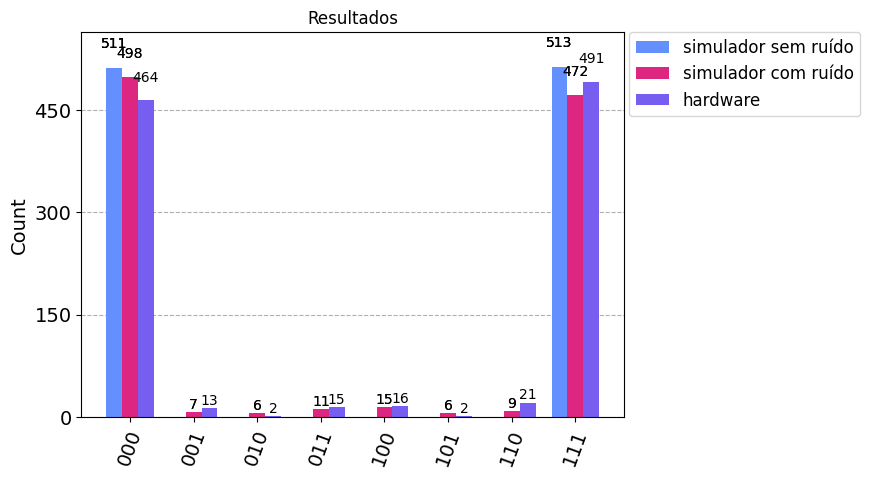

In [ ]:
retrieved_job_hardware = provider.backend.retrieve_job("cnmaq7wq9ax00087gmbg")
counts_hardware = retrieved_job_hardware.result().get_counts()

legend=["simulador sem ruído", "simulador com ruído", "hardware"]
plot_histogram([counts_simulator, counts_simulator_noisy, counts_hardware], title="Resultados", legend=legend)

___________
___________
___________

# Qiskit Runtime

<img src="https://qiskit.org/ecosystem/ibm-runtime/_images/runtime-architecture.png">

Um conceito importante no Runtime é o uso das **Primitives**:


**Estimator**- *Allows a user to specify a list of circuits and observables and selectively group between the lists to efficiently evaluate expectation values and variances for a parameter input. It is designed to enable users to efficiently calculate and interpret expectation values of quantum operators that are required for many near-term quantum algorithms.*

> Na prática, usamos essa primitiva quando nosso objetivo é calcular o **valor esperado de observáveis**, ou, melhor dizendo, quando os algoritmos quânticos que desejamos executar dependem do cálculo de valores esperados.

**Sampler** - *Allows a user to input a circuit and then generate quasi-probability distribution. This generation enables users to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.*

> Na prática, usamos essa primitiva quando nosso objetivo é calcular a **distribuição de medidas**, ou, melhor dizendo, quando os algoritmos quânticos que desejamos executar dependem do counts das medidas.

<img src="https://imageio.forbes.com/specials-images/imageserve/636c03503d88e77a7d42ae4f/IBM-Qiskit-Runtime-Primitives/960x0.jpg?height=356&width=624&fit=bounds" width=600>

No caso dos algoritmos híbridos de otimização que conheçemos, é mais natural que usemos a primitiva **Estimator**, então vamos seguir a explorando.

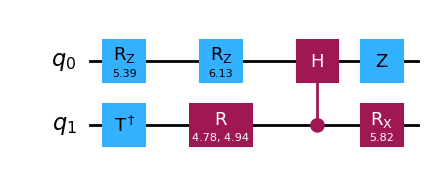

In [ ]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 4, seed=42)
display(circuit.draw("mpl", style="iqp"))

In [ ]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")

print(f"Observable: {observable.paulis}")

Observable: ['XZ']


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options

# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

options = Options()
options.simulator.seed_simulator = 42
options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    # <psi|XZ|psi>
    estimator_job = estimator.run(circuit, observable)

    print(estimator_job.status())

print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<XZ> = 0.7


Podemos também usar um simulador ruidoso, configurando adequadamente o objeto `Option`:

In [ ]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_hanoi')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)

options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    # <psi|XZ|psi>
    estimator_job = estimator.run(circuit, observable)

    print(estimator_job.status())

print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<XZ> = 0.65


Uma das vantagens de usar o Qiskit Runtime está nas funcionalidades de supressão e mitigação de erros:

<table class="block mx-auto md:mx-0 w-full border-spacing-0 whitespace-nowrap md:whitespace-normal overflow-x-auto md:tabular-nums text-text-01"><thead><tr class="border-ui-02 border-b"><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Resilience Level</th><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Definition</th><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Estimator</th><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Sampler</th></tr></thead><tbody><tr class="border-ui-02 border-b"><td class="p-12 m-0">0</td><td class="p-12 m-0">No mitigation</td><td class="p-12 m-0">None</td><td class="p-12 m-0">None</td></tr><tr class="border-ui-02 border-b"><td class="p-12 m-0">1 [Default]</td><td class="p-12 m-0">Minimal mitigation costs: Mitigate error associated with readout errors</td><td class="p-12 m-0">Twirled Readout Error eXtinction  (TREX)</td><td class="p-12 m-0">Matrix-free Measurement Mitigation (M3)</td></tr><tr class="border-ui-02 border-b"><td class="p-12 m-0">2</td><td class="p-12 m-0">Medium mitigation costs. Typically reduces bias in estimators, but is not guaranteed to be zero-bias.</td><td class="p-12 m-0">Zero Noise Extrapolation (ZNE)</td><td class="p-12 m-0">N/A</td></tr><tr class="border-ui-02 border-b"><td class="p-12 m-0">3</td><td class="p-12 m-0">Heavy mitigation with layer sampling. Theoretically expected to deliver zero-bias estimators.</td><td class="p-12 m-0">Probabilistic Error cancelation (PEC)</td><td class="p-12 m-0">N/A</td></tr></tbody></table>
<div class="rounded border border-solid border-ui-02 not-prose my-12 lg:my-16"><div class="bg-ui-02 text-text-01 font-600 p-12 py-8 flex items-center gap-8"><svg focusable="false" preserveAspectRatio="xMidYMid meet" xmlns="http://www.w3.org/2000/svg" fill="currentColor" width="16" height="16" viewBox="0 0 32 32" aria-hidden="true" class="text-icon-primary"><path fill="none" d="M16,8a1.5,1.5,0,1,1-1.5,1.5A1.5,1.5,0,0,1,16,8Zm4,13.875H17.125v-8H13v2.25h1.875v5.75H12v2.25h8Z" data-icon-path="inner-path"></path><path d="M16,2A14,14,0,1,0,30,16,14,14,0,0,0,16,2Zm0,6a1.5,1.5,0,1,1-1.5,1.5A1.5,1.5,0,0,1,16,8Zm4,16.125H12v-2.25h2.875v-5.75H13v-2.25h4.125v8H20Z"></path></svg>

E podemos também definir níveis de otimização de compilação e supressão de erros:

<table class="block mx-auto md:mx-0 w-full border-spacing-0 whitespace-nowrap md:whitespace-normal overflow-x-auto md:tabular-nums text-text-01"><thead><tr class="border-ui-02 border-b"><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Optimization Level</th><th class="text-productive-heading-01 border-ui-02 border-t p-12 m-0 text-left empty:hidden">Estimator &amp; Sampler</th></tr></thead><tbody><tr class="border-ui-02 border-b"><td class="p-12 m-0">0</td><td class="p-12 m-0"><p class="group paragraph-el text-text-primary mx-0">No optimization: typically used for hardware characterization or debugging</p><ul class="list-outside ml-16 px-16 list-disc">
<li >Basis translation</li>
<li >Layout (as specified)</li>
<li >Routing (stochastic swaps)</li>
</ul></td></tr><tr class="border-ui-02 border-b"><td class="p-12 m-0">1, 2, 3</td><td class="p-12 m-0"><p class="group paragraph-el text-text-primary mx-0">Light optimization:</p><ul class="list-outside ml-16 px-16 list-disc">
<li >Layout (trivial → vf2 → SabreLayout if routing is required)</li>
<li >Routing (SabreSWAPs if needed)</li>
<li >1Q gate optimization</li>
<li >Error suppression: dynamical decoupling</li>
</ul></td></tr></tbody></table>

Para mais detalhes, veja [a documentação](https://docs.quantum.ibm.com/run/configure-error-mitigation).

Vamos rodar o mesmo algoritmo, com os níveis máximos de otimização e supressão de erros:

In [ ]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_hanoi')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)

options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

# usando supressão e mitigação de ruídos!!
options.execution.shots = 1000
options.optimization_level = 3
options.resilience_level = 2

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    # <psi|XZ|psi>
    estimator_job = estimator.run(circuit, observable)

    print(estimator_job.status())

print(f'\n<{observable.paulis[0]}> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<XZ> = 0.670166666666667


Note como o valor esperado ficou mais próximo do valor ideal (sem ruídos) quando usamos supressão e mitigação de erros!

Também podemos usar o `Estimator` com um circuito parametrizado, e um operador mais complexo cujo valor esperado queremos calcular:

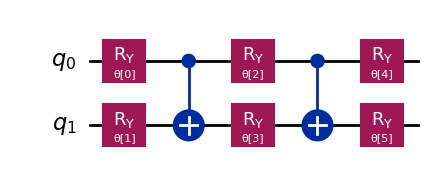

Observable: SparsePauliOp(['II', 'IZ', 'XI'],
              coeffs=[1.+0.j, 2.+0.j, 3.+0.j])


In [ ]:
from qiskit.circuit.library import RealAmplitudes

psi = RealAmplitudes(num_qubits=2, reps=2)

display(psi.decompose().draw("mpl", style="iqp"))

H = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])

print(f"Observable: {H}")

Sem ruído:

In [ ]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

options = Options()
options.simulator.seed_simulator = 42
options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    theta = [0, 1, 1, 2, 3, 5]

    # <psi(theta)|H|psi(theta)>
    estimator_job = estimator.run(psi, H, parameter_values=theta)

    print(estimator_job.status())

H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.59


Com ruído, sem otimização, supressão e mitigação de erros:

In [ ]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_hanoi')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)

options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

options.execution.shots = 1000
options.optimization_level = 0
options.resilience_level = 0

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    theta = [0, 1, 1, 2, 3, 5]

    # <psi(theta)|H|psi(theta)>
    estimator_job = estimator.run(psi, H, parameter_values=theta)

    print(estimator_job.status())

H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.5300000000000002


Com ruído, otimização, supressão e mitigação de erros:

In [ ]:
# serviço do runtime
service = QiskitRuntimeService()

# simulador sem ruído
backend = "ibmq_qasm_simulator"

# simulador com ruído
hardware = provider.get_backend('ibm_hanoi')
fake_backend = AerSimulator.from_backend(hardware)
noise_model = NoiseModel.from_backend(hardware)

options = Options()

# opções do simulador, passando o ruído!
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

# usando supressão e mitigação de ruídos!!
options.execution.shots = 1000
options.optimization_level = 3
options.resilience_level = 2

# criando a sessão pro envio do job
with Session(service=service, backend=backend):

    estimator = Estimator(options=options)

    theta = [0, 1, 1, 2, 3, 5]

    # <psi(theta)|H|psi(theta)>
    estimator_job = estimator.run(psi, H, parameter_values=theta)

    print(estimator_job.status())

H_str = " + ".join([f'{coef.real}*{pauli}' for pauli, coef in zip(H.paulis, H.coeffs)])
print(f'\n<({H_str})> = {estimator_job.result().values[0]}')

JobStatus.RUNNING

<(1.0*II + 2.0*IZ + 3.0*XI)> = 1.5610000000000013


Aqui novamente, a mitigação de erros ajudou bem!

__________________


# Algumas dicas finais

Vamos relembrar do knapsack problem:

In [ ]:
from docplex.mp.model import Model

from qiskit_algorithms import NumPyMinimumEigensolver

from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp

import numpy as np

import rustworkx as rx
from rustworkx.visualization import mpl_draw

# ============================================

scores_array = np.array([5, 4, 7, 2])
weights_array = np.array([7, 2, 1, 9])
max_capacity = 15

model_knapsack = Model(name="knapsack")

variables_knapsack = np.array([model_knapsack.binary_var(name=f"x_{i}") for i in range(scores_array.shape[0])])

model_knapsack.minimize(-scores_array.T@variables_knapsack)
model_knapsack.add_constraint(weights_array.T@variables_knapsack <= max_capacity)

print(model_knapsack.prettyprint())

# ============================================
print(f"\n{'='*80}\n")

converter = QuadraticProgramToQubo()
solver = NumPyMinimumEigensolver()

quad_knapsack = from_docplex_mp(model=model_knapsack)
qubo_knapsack = converter.convert(quad_knapsack)
print(qubo_knapsack.prettyprint())

# ============================================
print(f"\n{'='*80}\n")

print(qubo_knapsack.to_ising())

# ============================================
print(f"\n{'='*80}\n")

result_knapsack = solver.compute_minimum_eigenvalue(qubo_knapsack.to_ising()[0])

print(f"Valor ótimo: {result_knapsack.eigenvalue + qubo_knapsack.to_ising()[1]}")

answer_knapsack = np.array([int(char) for char in list(result_knapsack.eigenstate.to_dict().keys())[0][::-1]])
print(f"\nResposta ótima:\n{answer_knapsack}")

// This file has been generated by DOcplex
// model name is: knapsack
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;

minimize
 - 5 x_0 - 4 x_1 - 7 x_2 - 2 x_3;
 
subject to {
 7 x_0 + 2 x_1 + x_2 + 9 x_3 <= 15;

}
None


Problem name: knapsack

Minimize
  19*c0@int_slack@0^2 + 76*c0@int_slack@0*c0@int_slack@1
  + 152*c0@int_slack@0*c0@int_slack@2 + 304*c0@int_slack@0*c0@int_slack@3
  + 76*c0@int_slack@1^2 + 304*c0@int_slack@1*c0@int_slack@2
  + 608*c0@int_slack@1*c0@int_slack@3 + 304*c0@int_slack@2^2
  + 1216*c0@int_slack@2*c0@int_slack@3 + 1216*c0@int_slack@3^2
  + 266*x_0*c0@int_slack@0 + 532*x_0*c0@int_slack@1 + 1064*x_0*c0@int_slack@2
  + 2128*x_0*c0@int_slack@3 + 931*x_0^2 + 532*x_0*x_1 + 266*x_0*x_2
  + 2394*x_0*x_3 + 76*x_1*c0@int_slack@0 + 152*x_1*c0@int_slack@1
  + 304*x_1*c0@int_slack@2 + 608*x_1*c0@int_slack@3 + 76*x_1^2 + 76*x_1*x_2
  + 684*x_1*x_3 + 38*x_2*c0@int_slack@0 + 76*x_2*c0@int_slack@1
  + 152*x_2*c0@int_slack@2 + 304*x_2*c0@in

Na batalha de dados, a entrega final precisará ser feita:

- Utilizando um algoritmo híbrido;
- As classes prontas `VQE` e `QAOA` **NÃO** poderão ser utilizadas!
- O uso do runtime é opcional;
- Pergunta: como usar o hardware?

## Desejamos uma ótima batalha de dados!

__________
__________
__________